# Buyers Time Prediction

This project was done as a part of the Hackathon organised by MachineHack.com.
https://www.machinehack.com/hackathons/buyers_time_prediction_challenge/overview


In this competition provided the visitor's session data, we are challenging the Machinehack community to come up with a regression algorithm to predict the time a buyer will spend on the platform.

### Data Used:

https://www.machinehack.com/hackathons/buyers_time_prediction_challenge/data

### EDA

In [1]:
#Importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.simplefilter('ignore')


In [2]:
#Read Data from CSV

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
#Getting insights of the Train data

print(train.info())

print('\n Describe \n')

print(train.describe())

train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   session_id      5429 non-null   object 
 1   session_number  5429 non-null   int64  
 2   client_agent    5269 non-null   object 
 3   device_details  5429 non-null   object 
 4   date            5429 non-null   object 
 5   purchased       5429 non-null   int64  
 6   added_in_cart   5429 non-null   int64  
 7   checked_out     5429 non-null   int64  
 8   time_spent      5429 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 381.9+ KB
None

 Describe 

       session_number    purchased  added_in_cart  checked_out    time_spent
count     5429.000000  5429.000000    5429.000000  5429.000000   5429.000000
mean      1072.835329     0.159145       0.162092     0.017499    663.194292
std       1436.351474     0.365845       0.368570     0.131132   1713.671664
min      

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877


In [4]:
# cheking null values

def  null_chk(df):
    df = df.copy()
    return df.isnull().sum()

print('Train:\n',null_chk(train))
print('Test:\n',null_chk(test))

Train:
 session_id          0
session_number      0
client_agent      160
device_details      0
date                0
purchased           0
added_in_cart       0
checked_out         0
time_spent          0
dtype: int64
Test:
 session_id         0
session_number     0
client_agent      59
device_details     0
date               0
purchased          0
added_in_cart      0
checked_out        0
dtype: int64


In [5]:
#Filling null values in the field client_agent

train['client_agent'].fillna('Other', inplace=True)
test['client_agent'].fillna('Other', inplace=True)

In [6]:
#Having the view of train dataset

train.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out,time_spent
0,57f879e70d3c5fc2a98102d64c9fd84e,715,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-22,1,0,0,236.886
1,a5442b0c7c33d0a811e7661e556b2de8,55,Product/8.0 iPhone/8.1.3,iPhone - iOS,2020-02-27,1,0,0,1277.455
2,305cb1486ed8610c00b37007926cb2c4,11,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_2 like ...,iPhone - MobileWeb,2019-08-01,0,0,0,21.704
3,f2c1ecc9993f0071df91ba178450498c,2794,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2019-12-30,0,1,0,455.201
4,e460830ae295e55d2216ebdc761ab9a6,3674,Mozilla/5.0 (iPhone; CPU iPhone OS 7_1_1 like ...,iPhone - Web,2019-09-10,0,0,0,1164.877


In [7]:
#Having the view of test dataset

test.head()

,session_id,session_number,client_agent,device_details,date,purchased,added_in_cart,checked_out
0,0bf72b05b2cf70dc5e28c3c09f9c4f97,99,Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....,Desktop - IE,2020-01-07,1,0,0
1,6bc696d99954e4f1367e845465186aef,935,Product/160393 Android/4.3 Device/samsung_GT-I...,Android Phone - Android,2020-02-13,0,0,0
2,3d8611a5ea0f621d205b67f09f663a89,902,Product/4.2.2 iPhone/7.1.2,iPhone - iOS,2019-10-14,1,0,0
3,a0351545c032fd0da36289410c6c3354,3223,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Desktop - IE,2020-01-26,0,0,0
4,dd8999772b0ab27225fb05e5df2f1da6,231,Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKi...,Desktop - Chrome,2020-01-29,0,0,0


### Feature Engineering

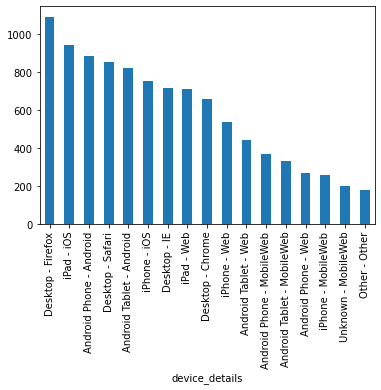

In [8]:
#Creating feature from device_details where with mean time spent
train.groupby('device_details')['time_spent'].mean().sort_values(ascending= False).plot(kind='bar')
plt.show()

mean_seq = train.groupby('device_details')['time_spent'].mean().sort_values()
mean_ordinal = {k: i for i,k in enumerate(mean_seq.index,0) }

#Creating new feature device_mean for train and test dataset

train['device_mean'] = train.device_details.map(mean_ordinal)

test['device_mean'] = test.device_details.map(mean_ordinal)

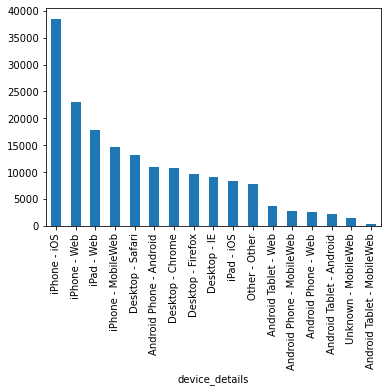

In [9]:
#Creating feature from device_details where with maximum time spent
train.groupby('device_details')['time_spent'].max().sort_values(ascending= False).plot(kind='bar')
plt.show()

max_seq = train.groupby('device_details')['time_spent'].max().sort_values()
max_ordinal = {k: i for i,k in enumerate(max_seq.index,0) }

#Creating new feature device_max for train and test dataset

train['device_max'] = train.device_details.map(max_ordinal)

test['device_max'] = test.device_details.map(max_ordinal)

In [10]:
#Converting into date format and extracting date features

def convert_date(df):
    #Extracting date
    df['date'] = pd.to_datetime(df['date'])
    #Extracting year
    df['year'] = df.date.dt.year
    #Extracting Month
    df['month'] = df.date.dt.month
    #Extracting Day of week
    df['day'] = df.date.dt.weekday
    #Extracting week of year
    df['weekofyear'] =df.date.dt.weekofyear
    
#Calling the function for test and train    
convert_date(train)
convert_date(test)

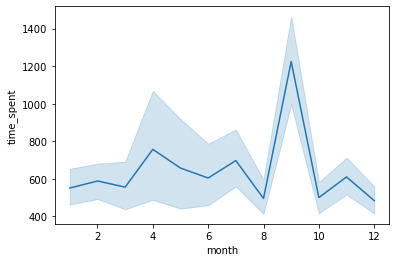

In [11]:
#Ploting relation between Month amd Time_spent

sns.lineplot(train.month,train.time_spent)

In [12]:
#Converting Month field into 3 buckets

train['month'] = train.month.apply(lambda x: 3 if x == 9 else (2 if x== 4 else 1))
test['month'] = test.month.apply(lambda x: 3 if x == 9 else (2 if x== 4 else 1))


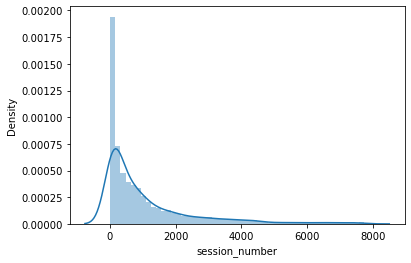

In [13]:
#Checking the distribution for session_number 
sns.distplot(train['session_number'])

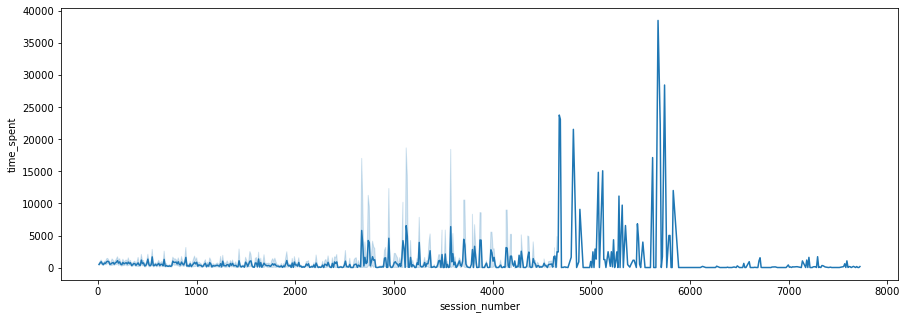

In [14]:
#ploting the distribution for sessio number and target variable 

plt.figure(figsize=(15,5))
sns.lineplot(train['session_number'],train['time_spent'])


In [15]:
#Spliting session_number into three bins

session_order = train.groupby('session_number')['time_spent'].mean().sort_values()
session_map = {k:i for i,k in enumerate(session_order.index,1)}

#Creating new field session_rank

train['session_rank'] = train.session_number.map(session_map)
test['session_rank'] = test.session_number.map(session_map)

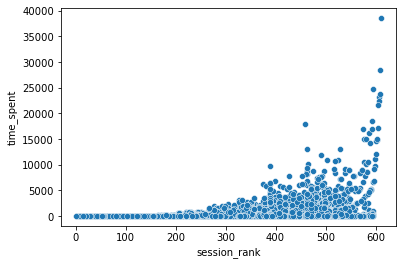

In [16]:
#Ploting the distribution with session_rank and target value session_rank

sns.scatterplot(train.session_rank,train.time_spent)

In [17]:
#For test dataset filling the empty rows for session_rank

test['session_rank'] = test['session_rank'].ffill()

In [18]:
#Creating new feature as a combination of two important fields purchased and added_in_cart

train['purchesed_added'] = train['purchased']*train['added_in_cart']
test['purchesed_added'] = test['purchased']*test['added_in_cart']

In [19]:
#Processing text field client_agent

#importing libraries
from nltk.corpus import stopwords

#Downloading English Stopwords 
eng_stopwords = stopwords.words("english")
import string
import re 

#removing special charecters
train['client_agent']= train.client_agent.apply(lambda x: re.sub(re.compile("[^\w\s]"), "", x))

#rfemoving numical values
train['client_agent']= train['client_agent'].apply(lambda x:  re.sub(re.compile(r"(\d)\_?(\d)?"), "", x) )

#removing '\_'
train['client_agent']= train['client_agent'].apply(lambda x:  re.sub(re.compile(r"\_?"), "", x) )

#changing the client_agent in lower case
train['client_agent'] = train['client_agent'].apply(lambda x : x.lower())

#adding following words in stop word list

eng_stopwords.append('cpu')
eng_stopwords.append('os')
eng_stopwords.append('like')
eng_stopwords.append('device_details')
eng_stopwords.append('otherproduct')
eng_stopwords.append('unknown')
eng_stopwords.append('otherother')


In [20]:
#using TfidfVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

#Creating bigrams
tf = TfidfVectorizer(ngram_range=(2, 2), lowercase=False, stop_words=eng_stopwords)

#Transfrom the client_agent field into bigram
train_route = tf.fit_transform(train['client_agent']) #+train['client_agent'])
test_route = tf.transform(test['client_agent'] )#+test['client_agent'])

#Creating pandas dataframe out of client_agent bigram
train_route = pd.DataFrame(data=train_route.toarray(), columns=tf.get_feature_names())
test_route = pd.DataFrame(data=test_route.toarray(), columns=tf.get_feature_names())

#printing the shape of data frame
train_route.shape,test_route.shape

((5429, 325), (2327, 325))

In [21]:
#Concatinating text processed fileds to main dataframe

train = pd.concat([train,train_route],axis=1)
test=pd.concat([test,test_route],axis=1)

In [22]:
#Select Numerical columns only

final_var=[var for var in train.columns if var not in ['session_id','session_number','client_agent','device_details',
                                                     'date','time_spent','device_Android Tablet - MobileWeb']]


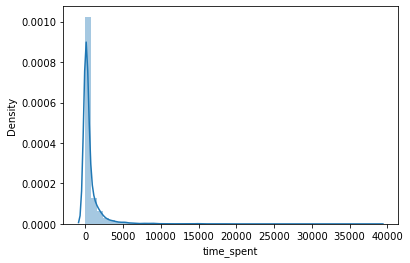

In [23]:
#Ploting the distribution for target fiels

sns.distplot(train.time_spent)

As there is a huge range for the value of target variable and it is skewed, I will split the whole dataset into two part with respect to target variable.
I will train the model with two spereate model for two dataset. 
I will run the Test data(Unknown data) through both the models and will avarage the result.

In [24]:
#Split the training data into two part with respect to the median value of the target variable

train1= train[train.time_spent <= train.time_spent.median()]
train2= train[train.time_spent > train.time_spent.median()]

#Printing the shape of the two newly created dataframe

print(train1.shape)
print(train2.shape)


(2715, 342)
(2714, 342)


In [25]:
#Creating Independent Features
train_inde = train1[final_var]

#Creating dependent features
train_dep = train1['time_spent']

#creating test(unseen) dataframe with final features
test_f = test[final_var]

In [26]:
from sklearn.decomposition import PCA

#Applying PCA
pca = PCA(n_components=1)
pca.fit(train_inde)

#Adding PCA as a feature to train and test dataset
train_inde['pca'] = pca.transform(train_inde)
test_f['pca'] = pca.transform(test_f)

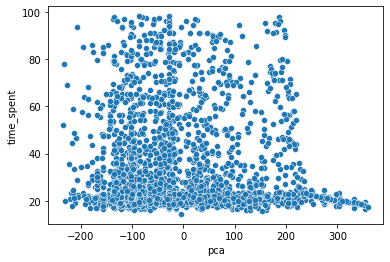

In [27]:
#Ploting the relationship between PCA and Target variabl

sns.scatterplot(train_inde.pca,train_dep)

In [28]:
# devide train data into traning and validation

from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(train_inde,train_dep,test_size=0.25,random_state=42)

In [29]:
#Scaling the variables with StandardScaler

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[final_var])

#Applying StandardScaler in the traning and validation dataset

X_train[final_var] = scaler.transform(X_train[final_var])
X_val[final_var] = scaler.transform(X_val[final_var])
test_f[final_var] = scaler.transform(test_f[final_var])
train_inde[final_var] = scaler.transform(train_inde[final_var])


### Model Building

In [30]:
#Hyperparameter tuning for XGBoost model

from xgboost import XGBRegressor
from xgboost import XGBRFRegressor
from sklearn.model_selection import GridSearchCV

#Defining a function for hyperparameter tuning

def hyperParameterTuning(X_train, y_train):
    
    param_tuning = {
        'learning_rate': [0.01, 0.1,0.3],
#         'learning_rate': [0.01],
        'max_depth': [ 5, 8, 10],
#         'max_depth': [ 17],
        'min_child_weight': [1, 3, 5],
#         'subsample': [0.5, 0.7],
#         'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [200, 400,600],
#         'n_estimators' : [1000],
        'reg_lambda' : [.1,.01,.05],
#         'objective': ['reg:squarederror']
    }
    

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,                        
                           scoring = 'neg_mean_absolute_error', #MAE
                           #scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)
    

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_
# {'max_depth': 15, 'n_estimators': 700}

In [31]:
#Calling function for hyperparameter tuning

# hyperParameterTuning(X_train, np.log(y_train))

In [32]:
#Declearing the XGBModel

XGBModel = XGBRegressor(
        objective = 'reg:squarederror',
        colsample_bytree = 0.7,
        learning_rate = 0.01,
        max_depth = 5,
        min_child_weight = 5,
        n_estimators = 400,
        subsample = 0.7,
        n_jobs = -1,
        reg_lambda = 0.01
        )

#Fitting values in XGBModel. Taking log of target variable as it is skewed 

XGBModel.fit(X_train, np.log(y_train), early_stopping_rounds=5, eval_set=[(X_val, np.log(y_val))], verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=5,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=-1, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=0.01, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
## Checking accuracy with XGBoost for the first half of the data

from sklearn.metrics import r2_score,mean_squared_log_error
from sklearn.model_selection import cross_val_predict

# Prediction with training dataset:
y_pred_XGB_train = XGBModel.predict(X_train)

# Prediction with testing dataset:
y_pred_XGB_test = XGBModel.predict(X_val)

# Find training accuracy for this model:
accuracy_XGB_train = r2_score(y_train, np.expm1(y_pred_XGB_train))
print("Training Accuracy for XGB Model: ", accuracy_XGB_train)

# Find testing accuracy for this model:
accuracy_XGB_test = r2_score(y_val, np.expm1(y_pred_XGB_test))
print("Testing Accuracy for XGB Model: ", accuracy_XGB_test)

# Find MSLE for training data:
MSLE_XGB_train = np.sqrt(mean_squared_log_error(y_train, np.expm1(y_pred_XGB_train)))
print("MSLE for Training Data: ", MSLE_XGB_train)

# Find MSLE for testing data:
MSLE_XGB_test = np.sqrt(mean_squared_log_error(y_val, np.expm1(y_pred_XGB_test)))
print("MSLE for Testing Data: ", MSLE_XGB_test)


# Prediction with 10-Fold Cross Validation:
y_pred_cv_XGB = cross_val_predict(XGBModel,train_inde, np.log1p(train_dep), cv=10)


# Find accuracy after 10-Fold Cross Validation
accuracy_cv_XGB = r2_score(train_dep, np.expm1(y_pred_cv_XGB))
print("Accuracy for 10-Fold Cross Predicted XGB Model: ", accuracy_cv_XGB)

# Find MSLE after 10-Fold Cross Validation
MSLE_cv_XGB = np.sqrt(mean_squared_log_error(train_dep, np.exp(y_pred_cv_XGB)))
print("MSLE for 10-Fold Cross Predicted XGB Model: ", MSLE_cv_XGB)



Training Accuracy for XGB Model:  0.28913787974122207
Testing Accuracy for XGB Model:  0.152391154571761
MSLE for Training Data:  0.35724000685757484
MSLE for Testing Data:  0.40177292302436607
Accuracy for 10-Fold Cross Predicted XGB Model:  0.1955565006004274
MSLE for 10-Fold Cross Predicted XGB Model:  0.38800637922184933


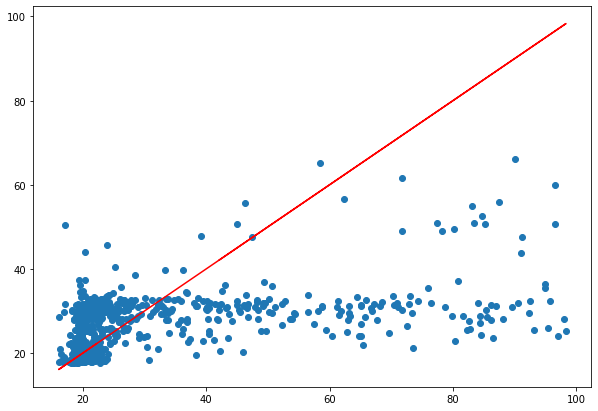

In [34]:
#Ploting the predicted and real values

plt.figure(figsize=(10,7))
plt.scatter(y_val,np.expm1(y_pred_XGB_test))
plt.plot(y_val,y_val,'r')

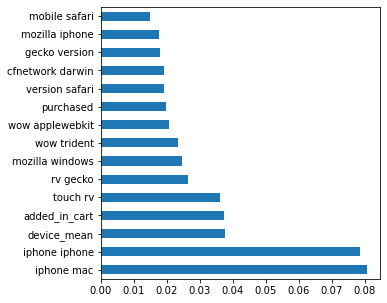

In [35]:
#Printing the 15 important features for XGBModel

imp_feat=pd.Series(XGBModel.feature_importances_,index=train_inde.columns)
plt.figure(figsize=(5,5))
imp_feat.sort_values(ascending = False)[:15].plot(kind='barh')

In [36]:
#Prediction with XGBModel

final_pred_1 = np.expm1(XGBModel.predict(test_f))

In [37]:
#Creating independent and dependent features for second features

train_inde_1 = train2[final_var]
train_dep_1 = train2['time_spent']
test_f_1 = test[final_var]
# train_inde_1

In [38]:
#Applying PCA

pca = PCA(n_components=1)
pca.fit(train_inde_1)

#Adding PCA as a feature to train and test dataset

train_inde_1['pca'] = pca.transform(train_inde_1)
test_f_1['pca'] = pca.transform(test_f_1)

In [39]:
#Spliting the train dataset into train and validation for the second model

X_train_1,X_val_1,y_train_1,y_val_1 = train_test_split(train_inde_1,train_dep_1,test_size=0.25,random_state=0)

In [40]:
#Scaling the variables with StandardScaler

from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
scaler1.fit(X_train_1[final_var])

#Applying StandardScaler in the traning and validation dataset

X_train_1[final_var] = scaler1.transform(X_train_1[final_var])
X_val_1[final_var] = scaler1.transform(X_val_1[final_var])
test_f_1[final_var] = scaler1.transform(test_f_1[final_var])
train_inde_1[final_var] = scaler1.transform(train_inde_1[final_var])

In [41]:
##Hyperparameter tuing for Random Forest Model

# params = { 
#     "max_depth":(list(range(8, 16))), 
#     "n_estimators":[200,400,600,800],
#     "max_features" : ['auto', 'sqrt']
# }


# tree_clf = RandomForestRegressor(random_state=42)
# tree_cv = GridSearchCV(tree_clf, params, n_jobs=-1, verbose=1, cv=3)
# tree_cv.fit(X_train_1, y_train_1)
# best_params = tree_cv.best_params_
# print(f"Best paramters: {best_params})")

In [42]:
#Declari g Random Forest model
RFModel = RandomForestRegressor(n_estimators=400,max_depth=14, max_features='sqrt')

#Fitting data into the model

RFModel.fit(X_train_1,np.log1p(y_train_1))

RandomForestRegressor(max_depth=14, max_features='sqrt', n_estimators=400)

In [43]:
## Checking accuracy with Random Forest

from sklearn.metrics import r2_score,mean_squared_log_error
from sklearn.model_selection import cross_val_predict

# Prediction with training dataset:
y_pred_RF_train_1 = RFModel.predict(X_train_1)

# Prediction with testing dataset:
y_pred_RF_test_1 = RFModel.predict(X_val_1)

# Find training accuracy for this model:
accuracy_RF_train_1 = r2_score(y_train_1, np.expm1(y_pred_RF_train_1))
print("Training Accuracy for RF Model: ", accuracy_RF_train_1)

# Find testing accuracy for this model:
accuracy_RF_test_1 = r2_score(y_val_1, np.expm1(y_pred_RF_test_1))
print("Testing Accuracy for RF Model: ", accuracy_RF_test_1)

# Find RMSE for training data:
RMSE_RF_train_1 = np.sqrt(mean_squared_log_error(y_train_1, np.expm1(y_pred_RF_train_1)))
print("RMSE for Training Data: ", RMSE_RF_train_1)

# Find RMSE for testing data:
RMSE_RF_test_1 = np.sqrt(mean_squared_log_error(y_val_1, np.expm1(y_pred_RF_test_1)))
print("RMSE for Testing Data: ", RMSE_RF_test_1)


# Prediction with 10-Fold Cross Validation:
y_pred_cv_RF_1= cross_val_predict(RFModel,train_inde_1, np.log1p(train_dep_1), cv=10)


# Find accuracy after 10-Fold Cross Validation
accuracy_cv_RF_1 = r2_score(train_dep_1, np.expm1(y_pred_cv_RF_1))
print("Accuracy for 10-Fold Cross Predicted RF Model: ", accuracy_cv_RF_1)

# Find RMSE after 10-Fold Cross Validation
RMSE_cv_RF_1 = np.sqrt(mean_squared_log_error(train_dep_1, np.exp(y_pred_cv_RF_1)))
print("RMSE for 10-Fold Cross Predicted RF Model: ", RMSE_cv_RF_1)


Training Accuracy for RF Model:  0.50825475777814
Testing Accuracy for RF Model:  0.2625736539124661
RMSE for Training Data:  0.7844847847026032
RMSE for Testing Data:  0.9919498761704252
Accuracy for 10-Fold Cross Predicted RF Model:  0.3388747011986356
RMSE for 10-Fold Cross Predicted RF Model:  0.9689106936392057


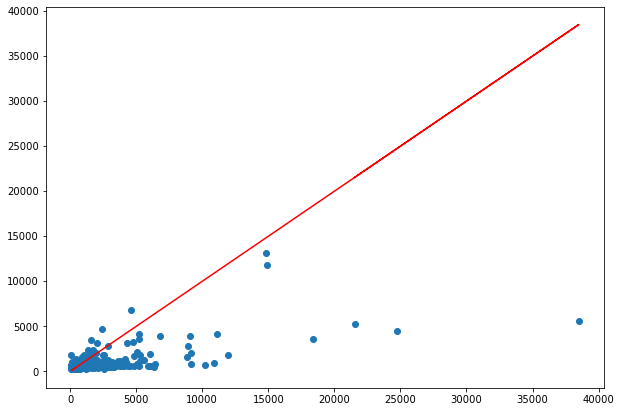

In [44]:
#Ploting the predicted and real values

plt.figure(figsize=(10,7))
plt.scatter(y_val_1,np.expm1(y_pred_RF_test_1))
plt.plot(y_val_1,y_val_1,'r')

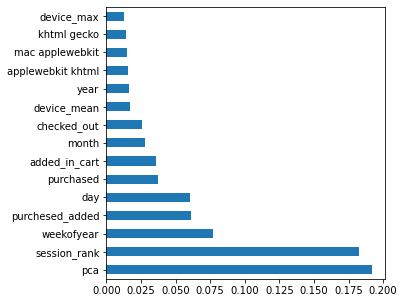

In [45]:
#Printing the 15 important features for RFModel

imp_feat=pd.Series(RFModel.feature_importances_,index=train_inde.columns)
plt.figure(figsize=(5,5))
imp_feat.sort_values(ascending = False)[:15].plot(kind='barh')

In [46]:
#Prediction with RFModel

final_pred_2 = np.expm1(RFModel.predict(test_f_1))


In [47]:
#Final Prediction by taking mean of XGBModel and RFModel

final = (final_pred_2+final_pred_1)/2

In [48]:
#Convering result into new dataframe

result = pd.DataFrame()
result['time_spent']= final 

#Final Result
result.head(5)

,time_spent
0,333.532429
1,270.346192
2,225.343314
3,149.938038
4,267.901083


In [49]:
# Exporting result to CSV

result.to_csv('Sample Submission.csv',index=False)